# Assignment 13: Imbalanced Data, Pipelines and AutoML

### Choosen Datasets:

**Multi-Class Classification - (for imbalanced classes practice)**

[FIFA 2019 game dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/)

<div style="display: flex; justify-content: space-between;">
    <img src="https://assets.goal.com/v3/assets/bltcc7a7ffd2fbf71f5/blt0fbec57c1d2bcf5b/60dd8b6eddcd520eeb913e76/0965fadc121dee53f39d2dbb3d5ce60a16de7195.jpeg?auto=webp&format=pjpg&width=3840&quality=60" width="300" alt="TEIAS Institute logo" />
</div>

The dataset is about predicting the position of football players in FIFA 2019 game.


**Explainable AI**

[Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist)

<div style="display: flex; justify-content: space-between;">
    <img src="https://mlops.systems/posts/2022-05-11-fashion-mnist-pixel-similarity_files/figure-html/cell-33-output-1.png" />
</div>

This is a dataset of 70,000 Zalando’s article images. Each image is a 28x28 grayscale image, associated with a label from 10 classes.

<hr>

### Group Members:


*   Ali Zahedzadeh
*   Melika Noubakhtian


<hr>

## **Multi-Class Classification**

multiclass classification or multinomial classification is the problem of classifying instances into one of three or more classes (classifying instances into one of two classes is called binary classification).

<hr>

### About The Datasets 

[FIFA 2019 game dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/)

**Context :**

Analytics of FIFA 19 video game

**Content :**

Player attributes of 18K+ players including league and specialty

[Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist)

**Context**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."


**Content**

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


**Labels**

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

<hr>

**Import Libararies**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation


**Load Dataset**

In [12]:
data = pd.read_csv('./Fifa19.csv')
data.head()

,Club,Playing_in_League,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
2,Real Madrid,Spain Primera Division (1),182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
3,Real Madrid,Spain Primera Division (1),192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
4,Real Madrid,Spain Primera Division (1),200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16344 entries, 0 to 16343
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Club                      16344 non-null  object 
 1   Playing_in_League         16344 non-null  object 
 2   ID                        16344 non-null  int64  
 3   Name                      16344 non-null  object 
 4   Age                       16344 non-null  int64  
 5   Photo                     16344 non-null  object 
 6   Nationality               16344 non-null  object 
 7   Flag                      16344 non-null  object 
 8   Overall                   16344 non-null  int64  
 9   Potential                 16344 non-null  int64  
 10  Club Logo                 16344 non-null  object 
 11  Value                     16344 non-null  object 
 12  Wage                      16344 non-null  object 
 13  Special                   16344 non-null  int64  
 14  Prefer

<hr>

## **Data loading and Cleaning pipeline using `Pandas` pipe**

In this part We use Pandas pipeline for data cleaning.
All of the codes and explainations based on our [Home Work 10](https://github.com/alizahedzadeh/ads-course/blob/main/assignments/Assignment%2010%20Deep%20Neural%20Networks/HW10_Deep_Neural_Networks.ipynb) codes.

In [14]:
import pandas as pd

# Define functions for each step in the pipeline

def load_data(df, path):
    return pd.read_csv(path)

def combine_related_positions(df):
    df.loc[df['Position']=='ST','Position']='CF'
    df.loc[df['Position']=='RS','Position']='RF'
    df.loc[df['Position']=='LS','Position']='LF'

    # Midfield
    df.loc[df['Position'].isin(['RCM','RAM','RDM']),'Position']='RM'
    df.loc[df['Position'].isin(['LCM','LAM','LDM']),'Position']='LM'
    df.loc[df['Position'].isin(['CAM','CDM']),'Position']='CM'

    # Defense
    df.loc[df['Position'].isin(['RW','RWB']),'Position']='RB'
    df.loc[df['Position'].isin(['LW','LWB','CB']),'Position']='LB'

    return df

def drop_columns(df):
    to_drop_columns = ['Name','Photo','Playing_in_League','Nationality','Flag','Club','Club Logo','Real Face','Joined','Contract Valid Until']
    df.drop(columns=to_drop_columns, inplace=True)
    return df

def convert_currency_to_number(x):
    output = x.replace('€','')
    if 'M' in x:
        output = output.replace('M','')
        output = float(output) * 1e6
    elif 'K' in x:
        output = output.replace('K','')
        output = float(output) * 1e3
    output = float(output)
    return output

def convert_height_to_number(x):
    output = x.replace("'",'.')
    return float(output) * 30.48

def convert_weight_to_number(x):
    output = x.replace("lbs",'')
    return float(output) * 0.4205

def clean_data(df):
    df.drop(['Loaned From'], axis=1, inplace=True)
    df.dropna(inplace=True)
    df['Value'] = df['Value'].apply(convert_currency_to_number)
    df['Wage'] = df['Wage'].apply(convert_currency_to_number)
    df['Release Clause'] = df['Release Clause'].apply(convert_currency_to_number)
    df['Height'] = df['Height'].apply(convert_height_to_number)
    df['Weight'] = df['Weight'].apply(convert_weight_to_number)

    # Skill columns processing
    skills_columns = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
                      'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB',
                      'LB','LCB','CB','RCB','RB']
    for col_name in skills_columns:
        df[col_name] = df[col_name].str.split('+').str[0]
        df[col_name] = df[col_name].astype(int)

    return df

# Create a Pandas pipeline using the pipe method
pandas_pipe_df = (
    pd.DataFrame()  # Initialize an empty dataframe
    .pipe(load_data, path='./Fifa19.csv')
    .pipe(combine_related_positions)
    .pipe(drop_columns)
    .pipe(clean_data)
)

# Display the resulting dataframe
pandas_pipe_df.head()


,ID,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,177003,32,91,91,67000000.0,420000.0,2280,Right,4.0,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
1,155862,32,91,91,51000000.0,380000.0,2201,Right,4.0,3.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
2,182521,28,90,90,76500000.0,355000.0,2190,Right,4.0,5.0,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156800000.0
4,200145,26,88,90,59500000.0,285000.0,2170,Right,3.0,3.0,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,126400000.0
5,197781,26,88,91,73500000.0,315000.0,2137,Right,3.0,3.0,...,86.0,60.0,64.0,51.0,10.0,8.0,12.0,15.0,6.0,156200000.0


In [15]:
pandas_pipe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13425 entries, 0 to 16343
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13425 non-null  int64  
 1   Age                       13425 non-null  int64  
 2   Overall                   13425 non-null  int64  
 3   Potential                 13425 non-null  int64  
 4   Value                     13425 non-null  float64
 5   Wage                      13425 non-null  float64
 6   Special                   13425 non-null  int64  
 7   Preferred Foot            13425 non-null  object 
 8   International Reputation  13425 non-null  float64
 9   Weak Foot                 13425 non-null  float64
 10  Skill Moves               13425 non-null  float64
 11  Work Rate                 13425 non-null  object 
 12  Body Type                 13425 non-null  object 
 13  Position                  13425 non-null  object 
 14  Jersey Numb

<hr>

## **Preprocessing pipeline using `Scikit-learn pipelines`**

The provided code creates a scikit-learn pipeline for predicting football player positions using. The pipeline includes data loading, preprocessing, and a Random Forest Classifier for training and testing. 

After training the model, it calculates the accuracy and displays a confusion matrix to evaluate the performance.
 
The confusion matrix visually represents the number of correct and incorrect predictions for each player position, aiding in understanding the model's predictive capabilities. 

In [22]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path = './Fifa19.csv'
df = pd.read_csv(path)

# Combine related positions
df.loc[df['Position'].isin(['ST', 'RS', 'LS']), 'Position'] = 'CF'
df.loc[df['Position'].isin(['RCM', 'RAM', 'RDM']), 'Position'] = 'RM'
df.loc[df['Position'].isin(['LCM', 'LAM', 'LDM']), 'Position'] = 'LM'
df.loc[df['Position'].isin(['CAM', 'CDM']), 'Position'] = 'CM'
df.loc[df['Position'].isin(['RW', 'RWB']), 'Position'] = 'RB'
df.loc[df['Position'].isin(['LW', 'LWB', 'CB']), 'Position'] = 'LB'

# Drop 'Loaned From' and handle null values
df.drop(['Loaned From'], axis=1, inplace=True)
df.dropna(inplace=True)

# Skill columns processing
skills_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
                  'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB',
                  'LB', 'LCB', 'CB', 'RCB', 'RB']

for col_name in skills_columns:
    df[col_name] = pd.to_numeric(df[col_name].str.split('+').str[0], errors='coerce')

# Drop unnecessary columns
to_drop_columns = ['Name', 'Photo', 'Playing_in_League', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Real Face', 'Joined', 'Contract Valid Until']
df.drop(to_drop_columns, axis=1, inplace=True)

# Convert currency columns to numbers
def convert_currency_to_number(x):
    output = x.replace('€', '')
    if 'M' in x:
        output = output.replace('M', '')
        output = float(output) * 1e6
    elif 'K' in x:
        output = output.replace('K', '')
        output = float(output) * 1e3
    output = float(output)
    return output

df['Value'] = df['Value'].apply(convert_currency_to_number)
df['Wage'] = df['Wage'].apply(convert_currency_to_number)
df['Release Clause'] = df['Release Clause'].apply(convert_currency_to_number)

# Convert height and weight to standard units
df['Height'] = df['Height'].apply(lambda x: float(x.replace("'", '.')) * 30.48)
df['Weight'] = df['Weight'].apply(lambda x: float(x.replace("lbs", '')) * 0.453592)

# Separate features and target
X = df.drop('Position', axis=1)
y = df['Position']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline with the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.60


**Confussion Matrix and Results**

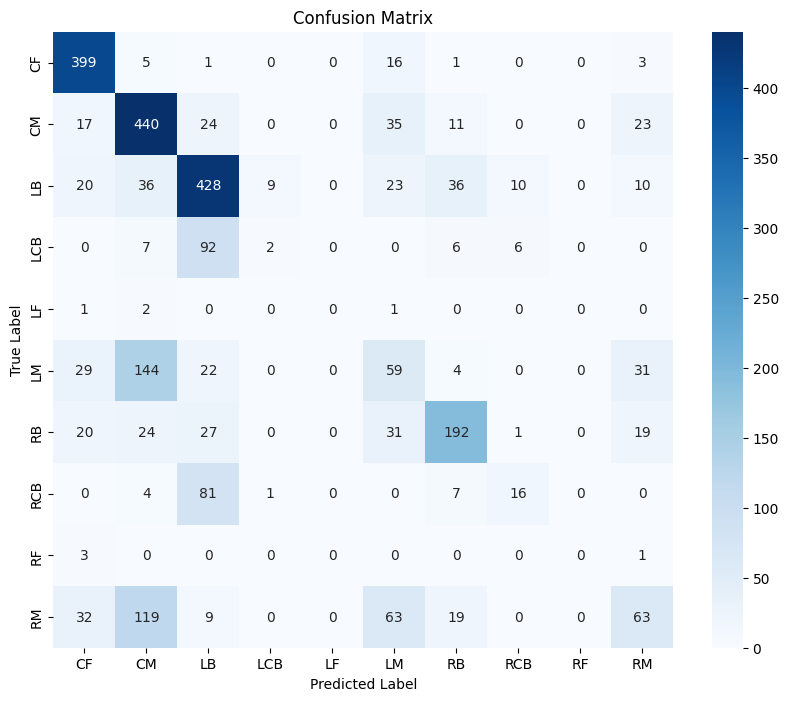

In [23]:
# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['classifier'].classes_, yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<hr>

## **Checking Imbalanced Class**

The provided code creates a bar plot to visualize the distribution of player positions in a dataset

And we can see Our dataset is have Imbalanced Classes.

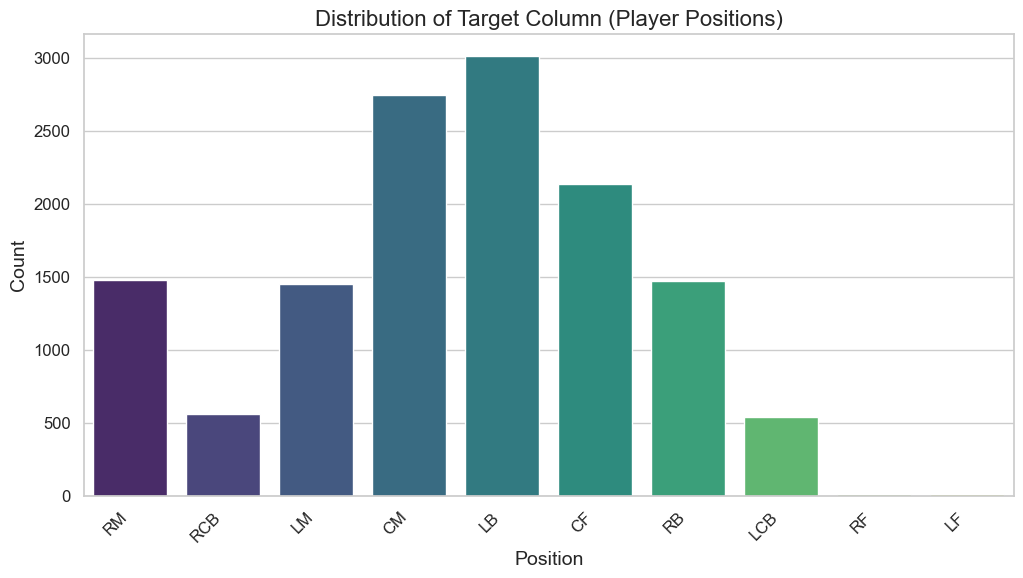

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y' is your target column
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(x='Position', data=df, hue='Position', palette="viridis", dodge=False)
plt.title('Distribution of Target Column (Player Positions)', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Random undersampling for the majority classes**

Accuracy before undersampling: 0.60


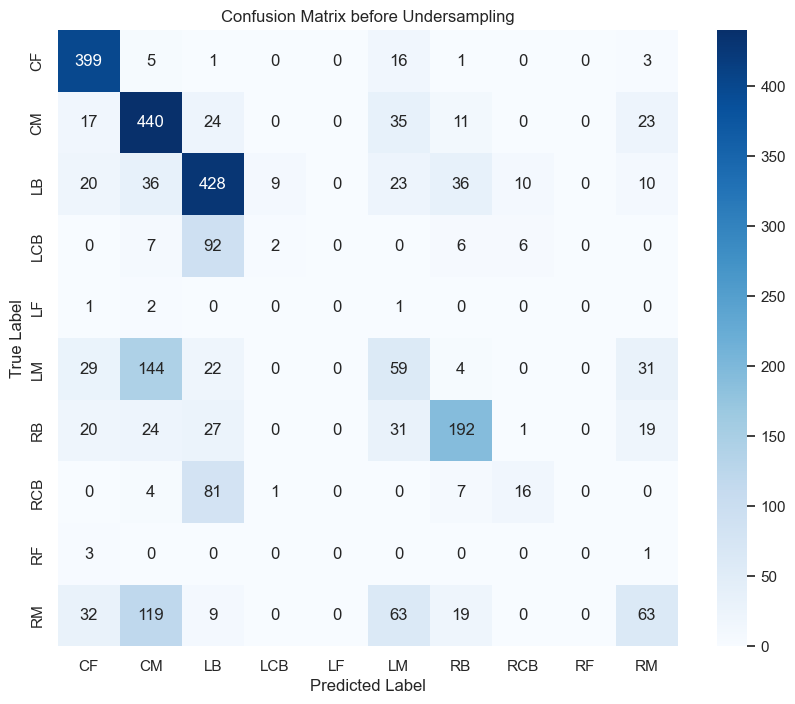

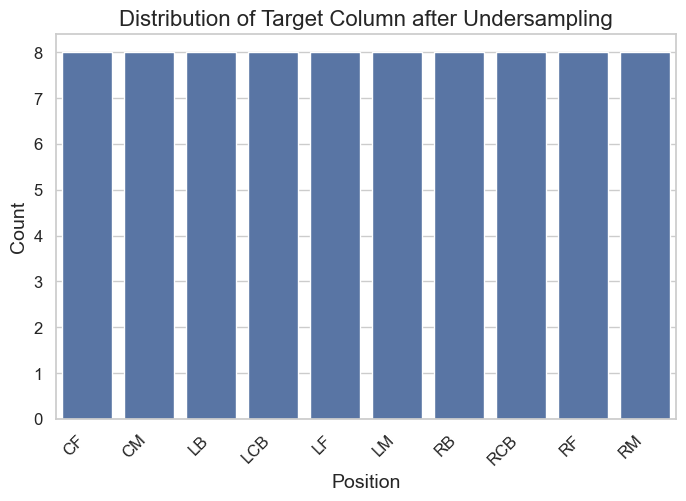

Accuracy after undersampling: 0.31


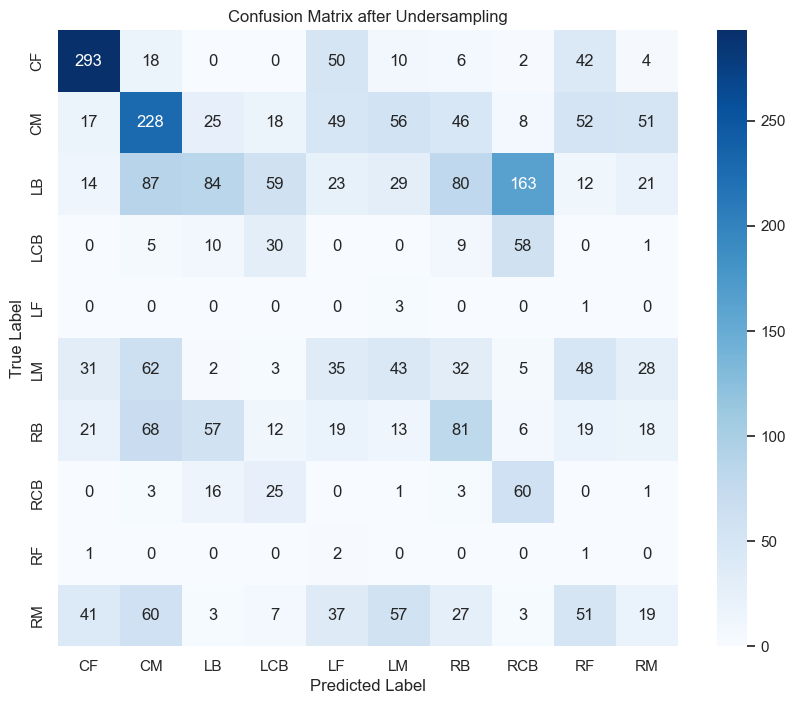

In [31]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separate features and target
X = df.drop('Position', axis=1)
y = df['Position']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline with the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the performance without undersampling
accuracy_before_undersampling = accuracy_score(y_test, y_pred)
print(f'Accuracy before undersampling: {accuracy_before_undersampling:.2f}')

# Calculate and display the confusion matrix without undersampling
conf_matrix_before_undersampling = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_before_undersampling, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['classifier'].classes_, yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix before Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Apply random undersampling to the majority class
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(x='Position', data=pd.DataFrame({'Position': y_resampled}))
plt.title('Distribution of Target Column after Undersampling', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Fit the pipeline on the resampled data
pipeline.fit(X_resampled, y_resampled)

# Predict on test data after undersampling
y_pred_undersampled = pipeline.predict(X_test)

# Evaluate the performance after undersampling
accuracy_after_undersampling = accuracy_score(y_test, y_pred_undersampled)
print(f'Accuracy after undersampling: {accuracy_after_undersampling:.2f}')

# Calculate and display the confusion matrix after undersampling
conf_matrix_after_undersampling = confusion_matrix(y_test, y_pred_undersampled)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_after_undersampling, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['classifier'].classes_, yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix after Undersampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## **Random oversampling for the miniority classes**

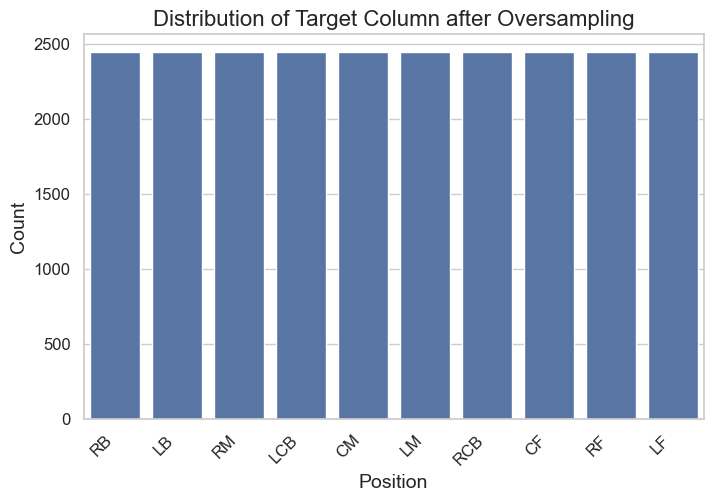

Accuracy after oversampling: 0.58


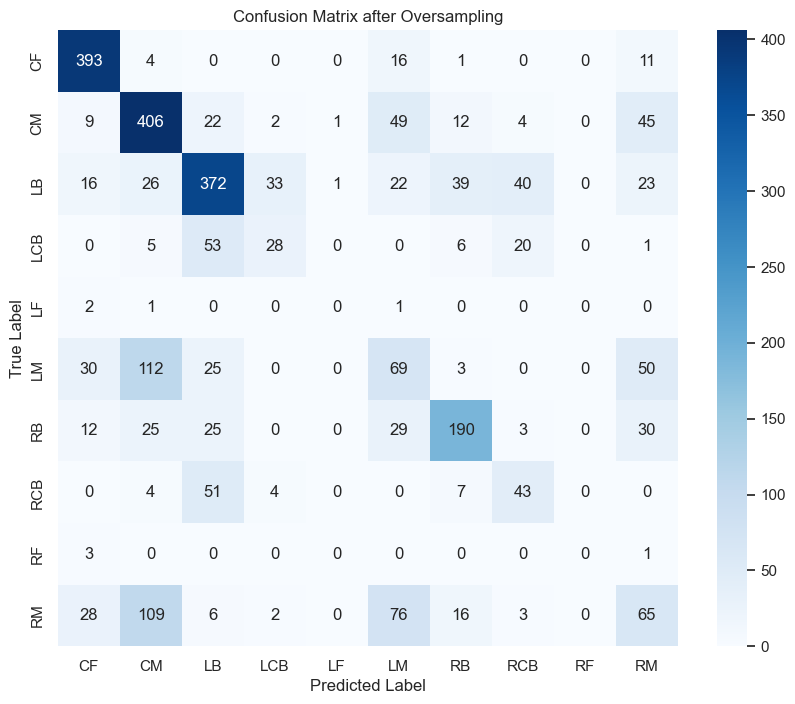

In [32]:
from imblearn.over_sampling import RandomOverSampler

# Separate features and target
X = df.drop('Position', axis=1)
y = df['Position']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply random oversampling to the minority class
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(x='Position', data=pd.DataFrame({'Position': y_resampled}))
plt.title('Distribution of Target Column after Oversampling', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the final pipeline with the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the resampled data
pipeline.fit(X_resampled, y_resampled)

# Predict on test data after oversampling
y_pred_oversampled = pipeline.predict(X_test)

# Evaluate the performance after oversampling
accuracy_after_oversampling = accuracy_score(y_test, y_pred_oversampled)
print(f'Accuracy after oversampling: {accuracy_after_oversampling:.2f}')

# Calculate and display the confusion matrix after oversampling
conf_matrix_after_oversampling = confusion_matrix(y_test, y_pred_oversampled)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_after_oversampling, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['classifier'].classes_, yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix after Oversampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## **SMOTE oversampling**

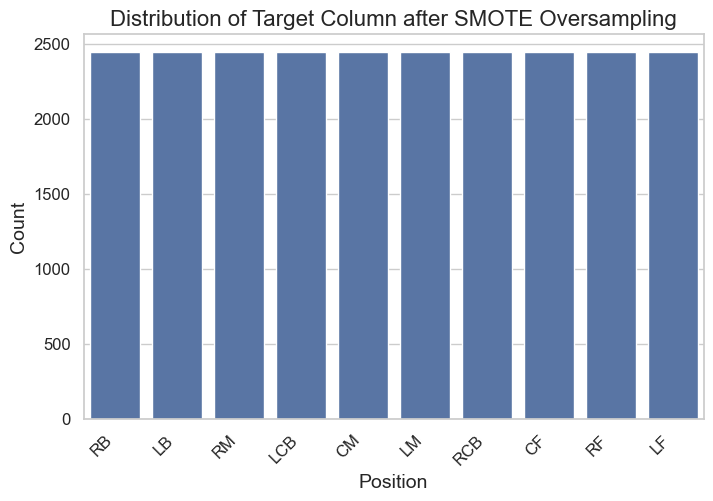

Accuracy after SMOTE oversampling: 0.57


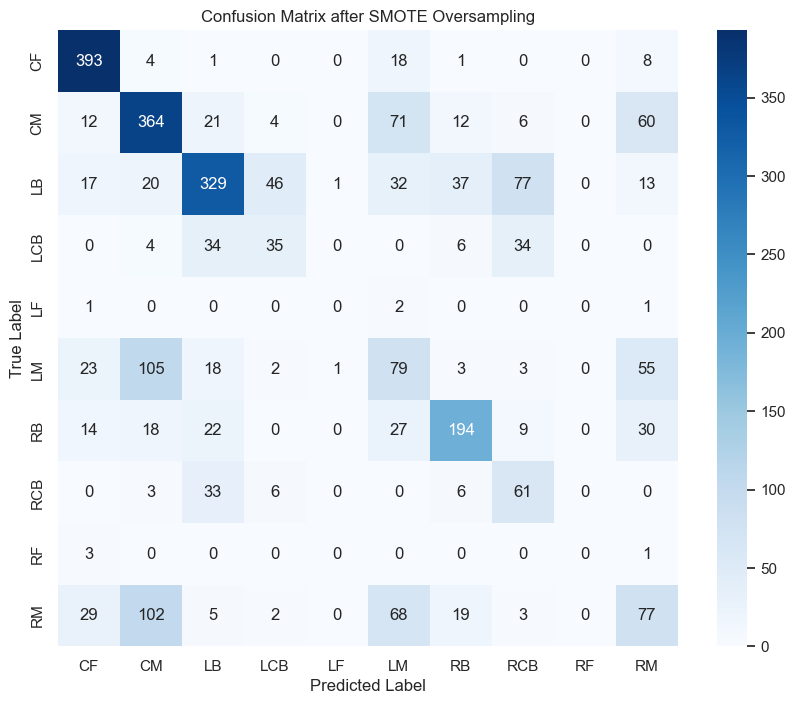

In [42]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('Position', axis=1)
y = df['Position']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE for oversampling to the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(x='Position', data=pd.DataFrame({'Position': y_resampled}))
plt.title('Distribution of Target Column after SMOTE Oversampling', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Create the final pipeline with the classifier
pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the resampled data
pipeline.fit(X_resampled, y_resampled)

# Predict on test data after SMOTE oversampling
y_pred_smote = pipeline.predict(X_test_preprocessed)

# Evaluate the performance after SMOTE oversampling
accuracy_after_smote = accuracy_score(y_test, y_pred_smote)
print(f'Accuracy after SMOTE oversampling: {accuracy_after_smote:.2f}')

# Calculate and display the confusion matrix after SMOTE oversampling
conf_matrix_after_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_after_smote, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['classifier'].classes_, yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix after SMOTE Oversampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **Use Class weights to perform cost-senisitve training**

This code adds the `compute_class_weight` function to calculate class weights and applies these weights to the `RandomForestClassifier` during the pipeline creation.

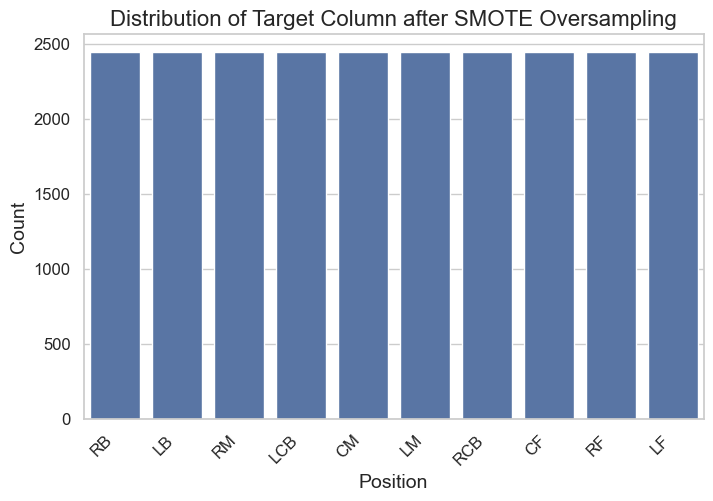

Accuracy after SMOTE oversampling: 0.57


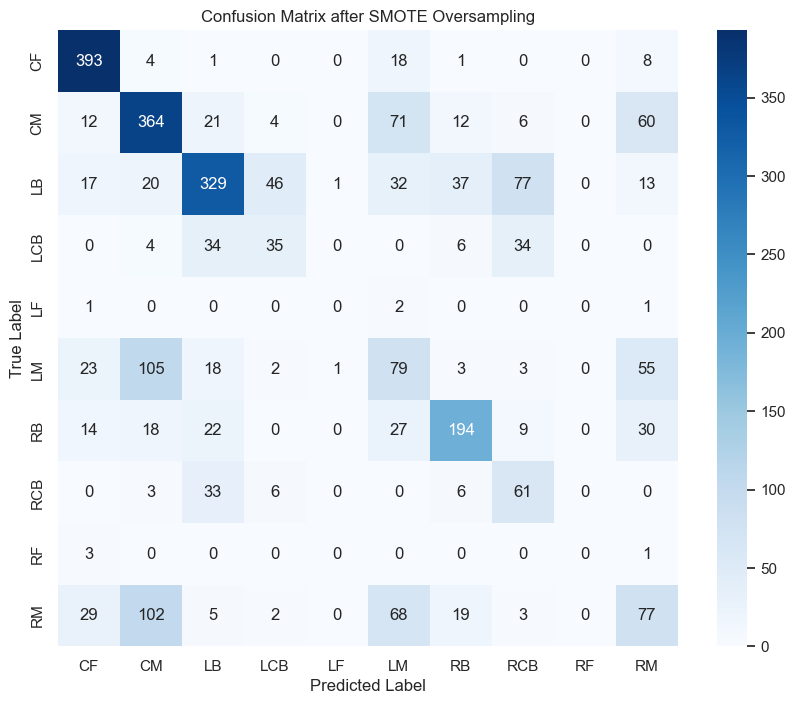

In [45]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# Separate features and target
X = df.drop('Position', axis=1)
y = df['Position']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE for oversampling to the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.countplot(x='Position', data=pd.DataFrame({'Position': y_resampled}))
plt.title('Distribution of Target Column after SMOTE Oversampling', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Manually define class weights based on our dataset
class_weights = {'CF': 1.0, 'CM': 1.0, 'LB': 1.0, 'LCB': 1.0, 'LF': 1.0, 'LM': 1.0, 'RB': 1.0, 'RCB': 1.0, 'RF': 1.0, 'RM': 1.0}

# Create the final pipeline with the classifier
pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42, class_weight=class_weights))
])

# Fit the pipeline on the resampled data
pipeline.fit(X_resampled, y_resampled)

# Predict on test data after SMOTE oversampling
y_pred_smote = pipeline.predict(X_test_preprocessed)

# Evaluate the performance after SMOTE oversampling
accuracy_after_smote = accuracy_score(y_test, y_pred_smote)
print(f'Accuracy after SMOTE oversampling: {accuracy_after_smote:.2f}')

# Calculate and display the confusion matrix after SMOTE oversampling
conf_matrix_after_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_after_smote, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.named_steps['classifier'].classes_, yticklabels=pipeline.named_steps['classifier'].classes_)
plt.title('Confusion Matrix after SMOTE Oversampling')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<hr>

## **Explainable AI**

Explainable artificial intelligence (XAI) is a set of processes and methods that allows human users to comprehend and trust the results and output created by machine learning algorithms. 

#### **Build `CNN` Model**

Epoch 1/10
750/750 [==============================] - 9s 12ms/step - loss: 0.5939 - accuracy: 0.7805 - val_loss: 0.4196 - val_accuracy: 0.8458
Epoch 2/10
750/750 [==============================] - 8s 11ms/step - loss: 0.3700 - accuracy: 0.8655 - val_loss: 0.3432 - val_accuracy: 0.8767
Epoch 3/10
750/750 [==============================] - 8s 11ms/step - loss: 0.3113 - accuracy: 0.8879 - val_loss: 0.3000 - val_accuracy: 0.8918
Epoch 4/10
750/750 [==============================] - 9s 11ms/step - loss: 0.2783 - accuracy: 0.8976 - val_loss: 0.3037 - val_accuracy: 0.8926
Epoch 5/10
750/750 [==============================] - 8s 11ms/step - loss: 0.2557 - accuracy: 0.9055 - val_loss: 0.2794 - val_accuracy: 0.8957
Epoch 6/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2371 - accuracy: 0.9130 - val_loss: 0.2665 - val_accuracy: 0.9032
Epoch 7/10
750/750 [==============================] - 9s 12ms/step - loss: 0.2167 - accuracy: 0.9202 - val_loss: 0.2597 - val_accuracy: 0.9067

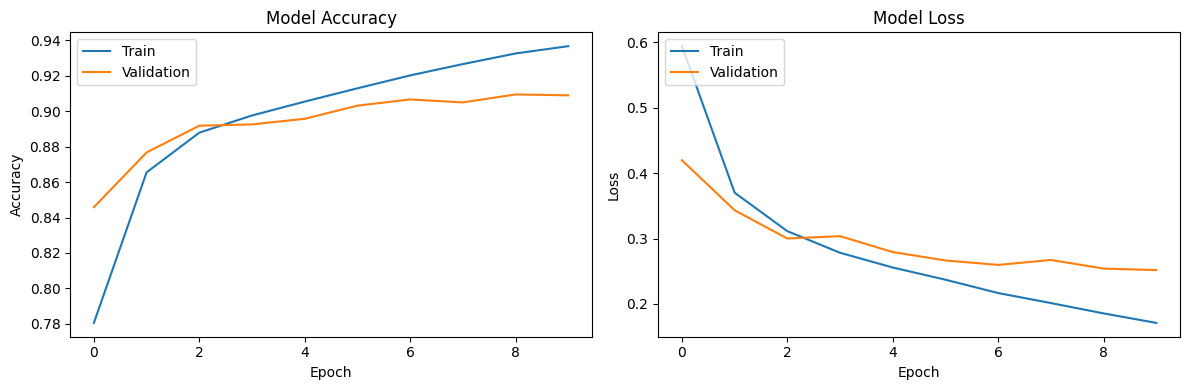

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and collect history for visualization
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


**Find Miss class index**

In [7]:
import numpy as np

# Evaluate the model on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Find misclassified indices
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# Print or analyze the misclassified indices
print("Misclassified Indices:", misclassified_indices)

# Now you can choose one of these misclassified indices for visualization
misclassified_index = misclassified_indices[0]

313/313 [==============================] - 1s 3ms/step
Misclassified Indices: [  17   23   25   27   29   42   44   48   49   51   66   67   68   98
  122  141  147  150  153  192  239  241  244  248  258  283  311  316
  324  325  361  374  378  379  381  382  395  396  441  444  454  455
  457  460  476  526  529  546  547  565  569  578  586  600  607  628
  634  635  670  681  688  702  703  711  724  732  738  753  760  764
  787  800  851  860  870  881  887  890  905  909  930  938  960  965
  976  977  979  994 1000 1005 1029 1061 1066 1101 1108 1111 1124 1131
 1139 1142 1147 1152 1162 1174 1192 1194 1197 1210 1218 1223 1224 1231
 1236 1254 1280 1285 1286 1300 1305 1315 1326 1335 1336 1374 1376 1387
 1388 1396 1408 1425 1438 1450 1462 1469 1482 1487 1496 1501 1509 1522
 1533 1557 1586 1602 1611 1617 1618 1620 1622 1626 1632 1640 1642 1643
 1645 1650 1661 1665 1682 1686 1701 1731 1743 1756 1769 1771 1778 1810
 1852 1856 1861 1867 1890 1900 1905 1943 1955 1964 1968 1970 1980 2001

#### **Explain why the model misclassified an image using `Grad-CAM`**

The provided code utilizes `Grad-CAM` (Gradient-weighted Class Activation Mapping) to offer insights into the misclassification of a particular image by a convolutional neural network (`CNN`). The process involves selecting a misclassified image, preprocessing it, obtaining model predictions, and then applying Grad-CAM to visualize the regions of the image that influenced the model's decision. The visualization includes the original image and a heatmap highlighting significant areas for the predicted class. This allows for a more interpretable understanding of the misclassification, showcasing which regions of the image were crucial in the decision-making process.

1/1 [==============================] - 0s 29ms/step


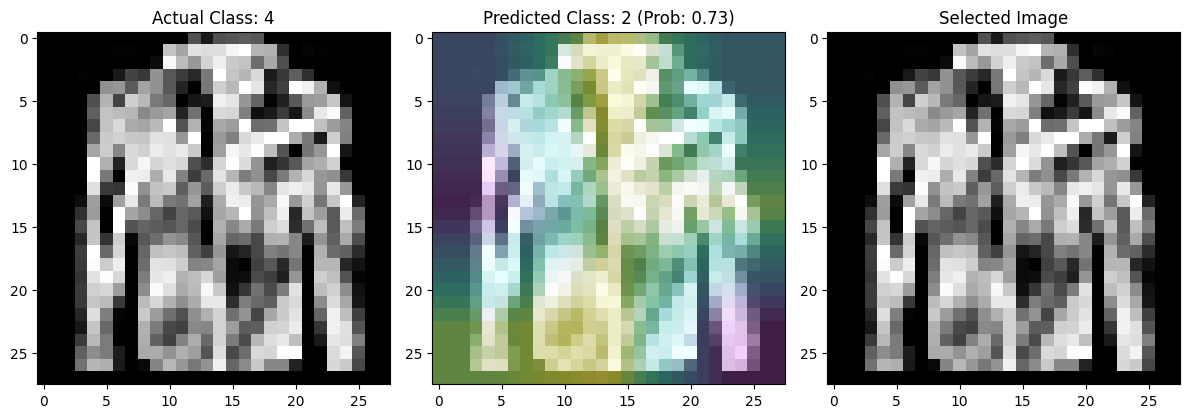

In [12]:
from tf_explain.core import GradCAM

# Preprocess the misclassified image
misclassified_image = test_images[misclassified_index]
misclassified_image = np.expand_dims(misclassified_image, axis=0)

# Get model predictions
predictions = model.predict(misclassified_image)
predicted_class = np.argmax(predictions)
predicted_probability = predictions[0, predicted_class]

# Choose the correct layer name for Grad-CAM
layer_name = 'conv2d_5'

# Calculate Grad-CAM
explainer = GradCAM()
grid = explainer.explain((misclassified_image, None), model, class_index=predicted_class, layer_name=layer_name)

# Plot the original image, Grad-CAM heatmap, and selected image
plt.figure(figsize=(12, 4))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(misclassified_image), cmap='gray')
plt.title(f'Actual Class: {np.argmax(test_labels[misclassified_index])}')

# Plot Grad-CAM heatmap
plt.subplot(1, 3, 2)
plt.imshow(grid, cmap='jet', alpha=0.8)
plt.imshow(np.squeeze(misclassified_image), cmap='gray', alpha=0.4)
plt.title(f'Predicted Class: {predicted_class} (Prob: {predicted_probability:.2f})')

# Plot the selected image
plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(misclassified_image), cmap='gray')
plt.title('Selected Image')

plt.tight_layout()
plt.show()



#### **Explain why the model misclassified an image using `SHAP`**

The code uses `SHAP` (SHapley Additive exPlanations) to visualize why a particular image was misclassified by a neural network. It selects a misclassified image, calculates SHAP values to determine the contribution of each pixel to the model's prediction, and then generates a visualization with the original image, a heatmap of normalized SHAP values, and the original image. This visualization helps interpret which pixels played a significant role in the misclassification, providing insights into the model's decision.

1/1 [==============================] - 0s 27ms/step


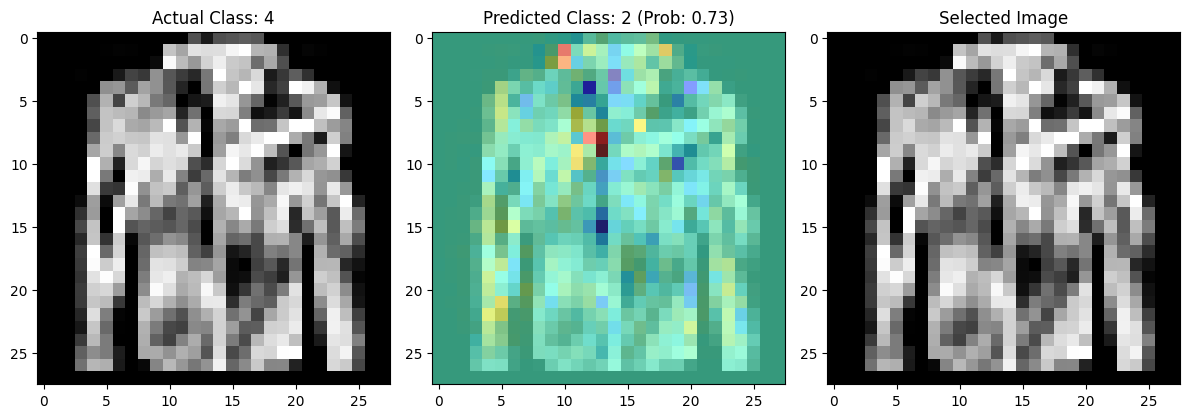

In [14]:
import shap

# Preprocess the misclassified image
misclassified_image = test_images[misclassified_index]
misclassified_image = np.expand_dims(misclassified_image, axis=0)

# Get model predictions
predictions = model.predict(misclassified_image)
predicted_class = np.argmax(predictions)
predicted_probability = predictions[0, predicted_class]

# Convert the misclassified image to a format suitable for SHAP
background = train_images[np.random.choice(train_images.shape[0], 100, replace=False)]
e = shap.DeepExplainer(model, background)

# Calculate SHAP values
shap_values = e.shap_values(misclassified_image)

# Take the SHAP values for the predicted class
shap_values_class = shap_values[predicted_class][0]

# Normalize the SHAP values
shap_values_normalized = (shap_values_class - shap_values_class.min()) / (shap_values_class.max() - shap_values_class.min())

# Plot the original image, SHAP values, and selected image
plt.figure(figsize=(12, 4))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(misclassified_image), cmap='gray')
plt.title(f'Actual Class: {np.argmax(test_labels[misclassified_index])}')

# Plot SHAP values
plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(shap_values_normalized), cmap='jet', alpha=0.8)
plt.imshow(np.squeeze(misclassified_image), cmap='gray', alpha=0.4)
plt.title(f'Predicted Class: {predicted_class} (Prob: {predicted_probability:.2f})')

# Plot the selected image
plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(misclassified_image), cmap='gray')
plt.title('Selected Image')

plt.tight_layout()
plt.show()


#### **Explain why the model misclassified an image using `LIME`**

The code incorporates `LIME` (Local Interpretable Model-agnostic Explanations) to elucidate why a particular image was misclassified by a neural network. It selects a misclassified image, generates a LIME explanation, and creates a visualization with the original image, the LIME explanation superimposed on it, and the original misclassified image. This visualization aids in understanding which regions of the image contributed significantly to the model's misclassification decision.

1/1 [==============================] - 0s 70ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


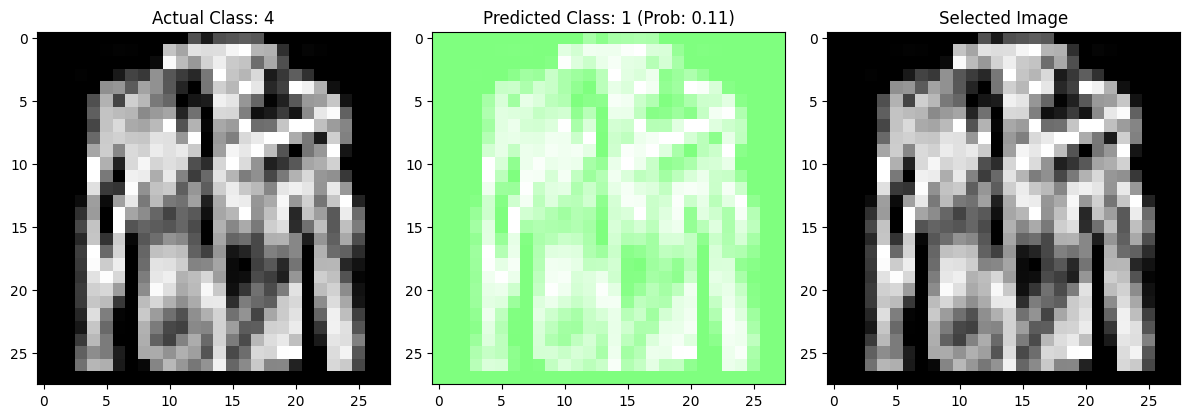

In [17]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the CNN model (assuming it is designed for RGB images)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Preprocess the misclassified image
misclassified_image = test_images[misclassified_index]
misclassified_image_rgb = np.concatenate([misclassified_image] * 3, axis=-1)  # Convert to RGB

# Get model predictions
predictions = model.predict(np.expand_dims(misclassified_image_rgb, axis=0))
predicted_class = np.argmax(predictions)
predicted_probability = predictions[0, predicted_class]

# Define the LimeImageExplainer
explainer = lime_image.LimeImageExplainer()

# Generate LIME explanation
explanation = explainer.explain_instance(misclassified_image_rgb.astype('double'), model.predict, top_labels=1, hide_color=0, num_samples=1000)

# Get the mask and superimpose it on the original image
lime_image, mask = explanation.get_image_and_mask(predicted_class, positive_only=False, num_features=5, hide_rest=False)
lime_image_boundaries = mark_boundaries(lime_image / 2 + 0.5, mask)

# Plot the original image, LIME explanation, and selected image
plt.figure(figsize=(12, 4))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(misclassified_image), cmap='gray')
plt.title(f'Actual Class: {np.argmax(test_labels[misclassified_index])}')

# Plot LIME explanation
plt.subplot(1, 3, 2)
plt.imshow(lime_image_boundaries)
plt.title(f'Predicted Class: {predicted_class} (Prob: {predicted_probability:.2f})')

# Plot the selected image
plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(misclassified_image), cmap='gray')
plt.title('Selected Image')

plt.tight_layout()
plt.show()

#### **Explain why the model misclassified an image using `Eli5`**

This code uses `Eli5` to provide an explanation for the model's misclassification of a given image. The explanation includes visualizations of the top features that contributed to the predicted class. 

In [4]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import eli5

In [5]:
from tensorflow import keras
import numpy as np

(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1)
X_train, X_test = X_train/255.0, X_test/255.0

classes =  np.unique(Y_train)
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
mapping = dict(zip(classes, class_labels))
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

**Define And Train CNN**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Input(shape=X_train.shape[1:]),
    layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"),

    layers.Flatten(),
    layers.Dense(len(classes), activation="softmax")
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         1160      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 68834 (268.88 KB)
Trainable params: 68834 (268.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile("adam", "sparse_categorical_crossentropy", ["accuracy"])

In [8]:
model.fit(X_train, Y_train, batch_size=256, epochs=8, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - ETA: 0s - loss: 0.5446 - accuracy: 0.8094

d:\Teias\Usage\Term-1\ADS\Assignments\ads-course\env\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 10s 163us/sample - loss: 0.5446 - accuracy: 0.8094 - val_loss: 0.3882 - val_accuracy: 0.8640
Epoch 2/8
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3340 - accuracy: 0.8821 - val_loss: 0.3375 - val_accuracy: 0.8825
Epoch 3/8
60000/60000 [==============================] - 10s 169us/sample - loss: 0.2912 - accuracy: 0.8961 - val_loss: 0.3138 - val_accuracy: 0.8871
Epoch 4/8
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2620 - accuracy: 0.9073 - val_loss: 0.3018 - val_accuracy: 0.8918
Epoch 5/8
60000/60000 [==============================] - 10s 164us/sample - loss: 0.2498 - accuracy: 0.9107 - val_loss: 0.2911 - val_accuracy: 0.8958
Epoch 6/8
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2303 - accuracy: 0.9177 - val_loss: 0.2827 - val_accuracy: 0.8975
Epoch 7/8
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2164 - accuracy: 0.9220 - v

d:\Teias\Usage\Term-1\ADS\Assignments\ads-course\env\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



Classification Report :
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.87      0.85      1000
       Dress       0.88      0.93      0.90      1000
        Coat       0.86      0.85      0.85      1000
      Sandal       0.99      0.96      0.98      1000
       Shirt       0.77      0.71      0.73      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.90      0.91      0.90     10000
weighted avg       0.90      0.91      0.90     10000



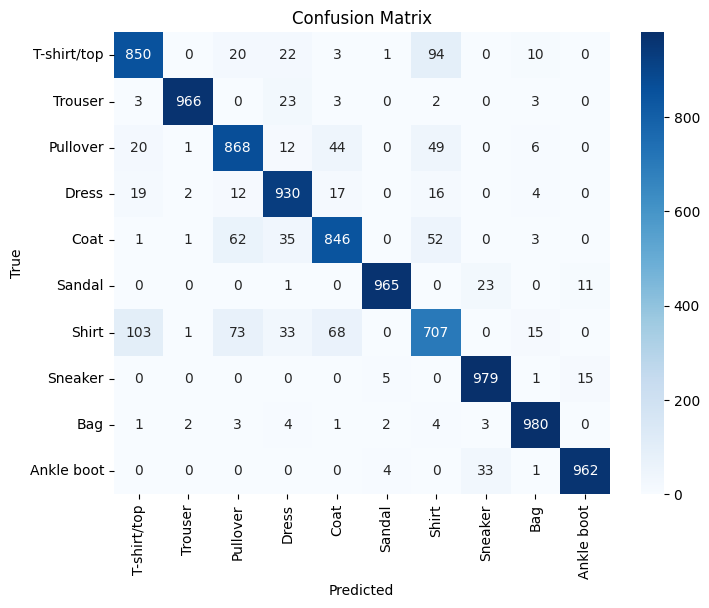

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Y_test_preds = model.predict(X_test)
Y_test_preds = np.argmax(Y_test_preds, axis=1)

# Calculate and print metrics
accuracy = accuracy_score(Y_test, Y_test_preds)
conf_matrix = confusion_matrix(Y_test, Y_test_preds)
class_report = classification_report(Y_test, Y_test_preds, target_names=class_labels)

print("\nClassification Report :")
print(class_report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In the given process, a random sample was chosen from the dataset, and predictions were made on this selected sample. Subsequently, the actual and predicted labels of the chosen image were displayed. Following this, the `explain_prediction()` function was invoked, utilizing our model and the selected sample. This function internally executes the Grad-CAM algorithm, producing an Explanation object. Within this Explanation object, both the original image and the corresponding heatmap are encapsulated. To visualize the outcome, the `format_as_image()` function from Eli5 was then employed, taking the explanation object as input. The resulting image exhibits the Grad-CAM heatmap superimposed on the original image.

In [10]:
import numpy as np
import eli5
# Randomly select a sample from the data
idx = np.random.choice(range(10000))

# Make predictions on the selected sample
prediction = model.predict(X_test[idx:idx+1]).argmax()
print("Actual Target    : {}".format(mapping[Y_test[idx]]))
print("Predicted Target : {}".format(mapping[prediction]))
# Call explain_prediction() function to run Grad-CAM algorithm
explanation = eli5.keras.explain_prediction.explain_prediction(model, X_test[idx:idx+1])

Actual Target    : Ankle boot
Predicted Target : Ankle boot


In [11]:
# Print actual and predicted labels of the selected image
print("Explanation Object : {}".format(type(explanation)))
print("Explanation Method : {}".format(explanation.method))
print("Explanation Description : {}".format(explanation.description))

Explanation Object : <class 'eli5.base.Explanation'>
Explanation Method : Grad-CAM
Explanation Description : Grad-CAM visualization for image classification; 
output is explanation object that contains input image 
and heatmap image for a target.



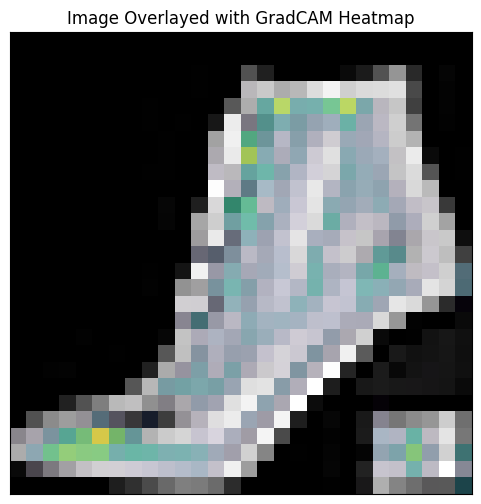

In [12]:
import matplotlib.pyplot as plt

# Obtain an Explanation object with the original image and heatmap
# Call format_as_image() to generate the final image with Grad-CAM heatmap overlay
image = eli5.format_as_image(explanation)

def show_image(image):
    fig = plt.figure(figsize=(6,6))
    plt.imshow(image);
    plt.xticks([],[]); plt.yticks([],[]);
    plt.title("Image Overlayed with GradCAM Heatmap")

show_image(image)

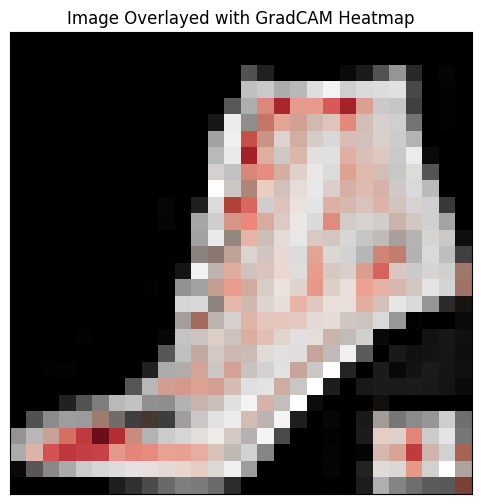

In [13]:
import matplotlib
from PIL import Image

image = eli5.format_as_image(explanation, colormap=matplotlib.cm.Reds, alpha_limit=0.9)

show_image(image)